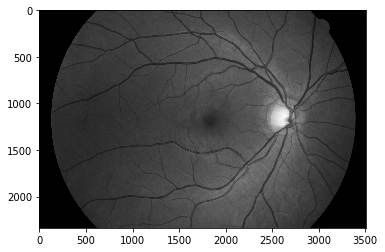

In [ ]:
import numpy as np
from helpers import poprawnoscWyniku,podzialNaCzesci
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline 

def diaplyAll(image, sinogram, reconstruction_fbp, normal):
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    imkwargs = dict(vmin=-0.2, vmax=0.2)
    axes[0, 0].set_title("Original")
    axes[0, 0].imshow(image, cmap=plt.cm.Greys_r)

    axes[0, 1].set_title("Radon transform\n(Sinogram)")
    axes[0, 1].set_xlabel("Projection angle (deg)")
    axes[0, 1].set_ylabel("Projection position (pixels)")
    axes[0, 1].imshow(sinogram, cmap=plt.cm.Greys_r,
                      extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

    axes[1, 0].set_title("Reconstruction\nFiltered back projection")
    axes[1, 0].imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
    axes[1, 1].set_title("Reconstruction error\nFiltered back projection")
    axes[1, 1].imshow(normal, cmap=plt.cm.Greys_r)
    fig.tight_layout()
    plt.show()
    
    
image1=imread("images/01_h.jpg")
image2=imread("images/01_h.jpg")
image3=imread("images/01_h.jpg")

plt.imshow(toGrey(image2,1))
plt.show()